In [ ]:
# default_exp data

In [ ]:
#export
from fastai2.vision.all import *
from colorup.core import *

In [ ]:
#hide
from nbdev.showdoc import *

# Dataset

> Utilities to prepare dataset

In order to have a good model, the first step is to have a great dataset. Here are a few sources which contain a large number of pictures of high quality:

- [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)
- [ImageNet](http://image-net.org/) - though it contains a bit too many pictures of dogs…

We initially save the data in `../data/train`.

In [ ]:
#export
def show_path_images(path):
    "Display sample data from `path`"
    imgs = random.sample(list(get_image_files(path)), 20)
    imgs = L(PILImage.create(i) for i in imgs)
    show_images(imgs, nrows=5)

In [ ]:
path = Path('../data')

We verify images and remove incorrect files.

In [ ]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)

## Training set

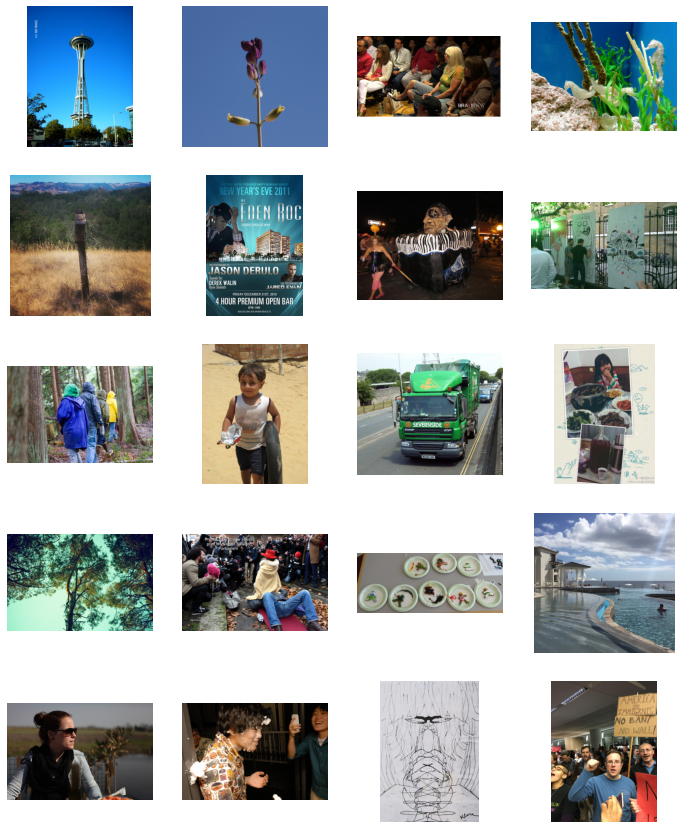

In [ ]:
#requires_data
set_seed(13)
show_path_images(path / 'train')

### Remove low quality pictures

We remove all files that are too small.

In [ ]:
def move_file(f, init_path, dest_path):
    "Move file f from init_path to dest_path, keeping folder structure"
    new_path = dest_path / f.relative_to(init_path)
    new_path.parent.mkdir(parents=True, exist_ok=True)
    print(f'Moving {f} to {new_path}')
    f.replace(new_path)

In [ ]:
def move_small_file_size(path, low_size_path, file_ext='jpg'):
    p = subprocess.run([f'find {path} -name *.{file_ext} -size -16k'], shell=True, text=True, capture_output=True)
    for f in p.stdout.splitlines():
        f = Path(f)
        move_file(f, path, low_size_path)

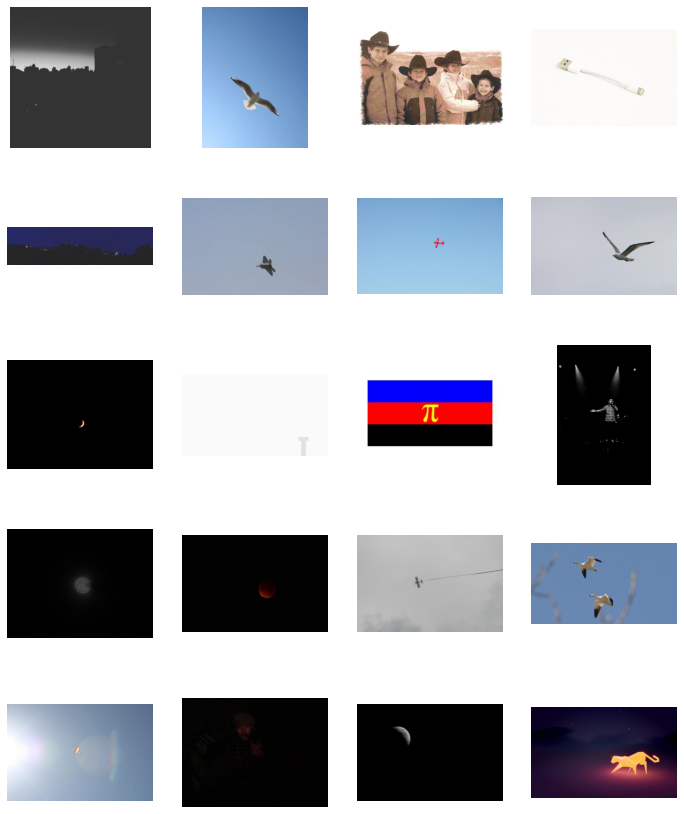

In [ ]:
#requires_data
low_size_path = path/'removed'/'low_size'
move_small_file_size(path/'train', low_size_path)
set_seed(13)
show_path_images(low_size_path)

### Remove black & white images

We just need to check images with neutral A & B channels in the LAB space.

We also take advantage to remove images with colorizing filters. After observing the range of values in LAB space of typical images, we can notice that A & B channels typically cover the entire range [0, 255]. When this is not the case, we will typically have a picture with a strong color accent due to filters, which we want to avoid.

In [ ]:
def find_black_and_white(path, black_and_white_path, display_only=True):
    "find black & white pictures"
    thresh = 300  # minimum delta required on channels A & B -> delta(A) + delta(B)
    getLAB = Pipeline([PILImage.create, RGBToLAB(), ToTensor(), Split_L_AB()])
    items = get_image_files(path)
    for f in progress_bar(items):
        _, img_AB = getLAB(f)
        AB_delta = sum([(img_AB[i].max() - img_AB[i].min()).item() for i in [0,1]])
        if (AB_delta) < thresh:
            if display_only:
                print(f'file {f} - AB_delta {AB_delta}')
                display(PILImage.create(f))
            else:
                move_file(f, path, black_and_white_path)

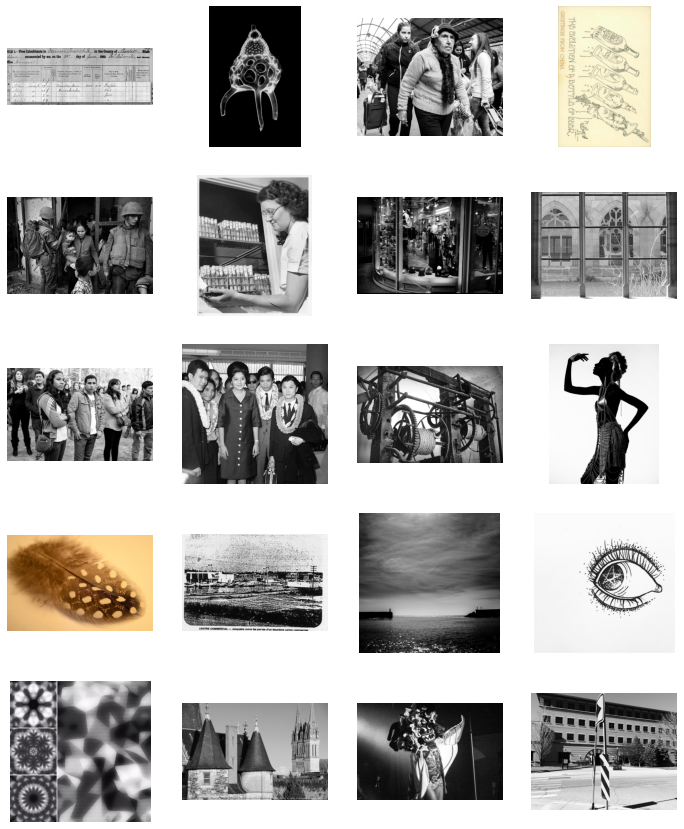

In [ ]:
#requires_data
black_and_white_path = path/'removed'/'black_and_white'
find_black_and_white(path/'train', black_and_white_path, display_only=False)
set_seed(13)
show_path_images(black_and_white_path)

## Validation set

We keep some images as part of the validation set.

Training set is assumed to be at `../data/train` and validation set at `../data/valid`.

In [ ]:
def create_validation_set(train_path, valid_path, n_valid):
    "Create a validation set"
    if valid_path.exists(): return print(f'Validation set already exists at {valid_path}')
    items = get_image_files(train_path)
    for f in np.random.choice(items, n_valid, replace=False):
        move_file(f, train_path, valid_path)
    print(f'Validation set created at {valid_path}')

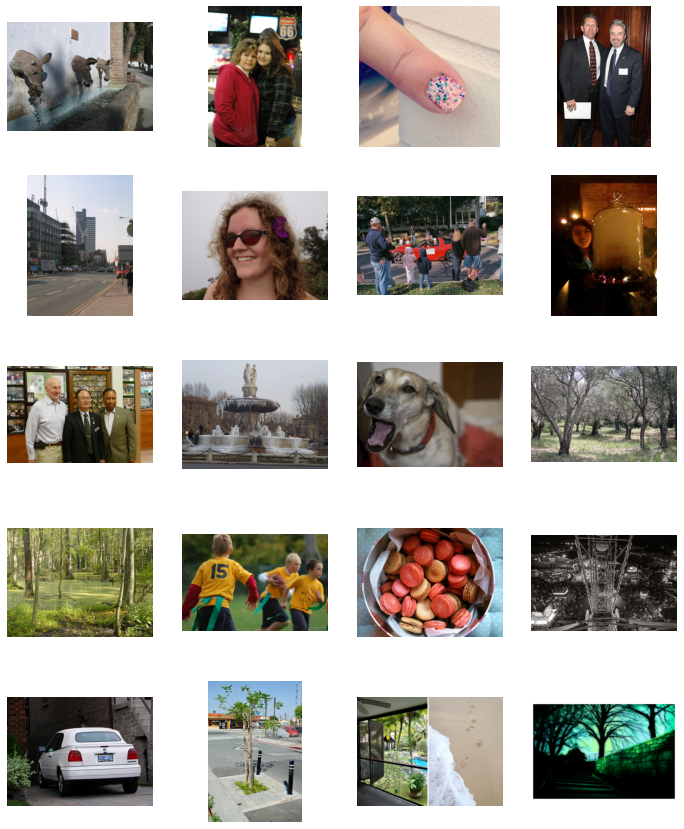

In [ ]:
#requires_data
create_validation_set(path/'train', path/'valid', 2**11)
set_seed(13)
show_path_images(path/'valid')

# Export -

In [ ]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_data.ipynb.
Converted index.ipynb.
